In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
repo_root = os.popen('git rev-parse --show-toplevel').read().strip()

In [3]:
data_folder = os.path.join(repo_root, 'multi-parameter-estimation', 'data')

# Get list of data directories
data_dirs = os.listdir(data_folder)
data_dirs = [d for d in data_dirs if os.path.isdir(os.path.join(data_folder, d))]
data_dirs.sort()
data_dirs

['2025-05-31--12h-43m-09s',
 '2025-05-31--12h-54m-34s',
 '2025-05-31--13h-05m-35s',
 '2025-05-31--13h-16m-25s',
 '2025-05-31--13h-27m-19s',
 '2025-05-31--13h-39m-01s',
 '2025-05-31--13h-50m-24s',
 '2025-05-31--14h-01m-48s',
 '2025-05-31--14h-13m-08s',
 '2025-05-31--14h-23m-49s',
 '2025-05-31--14h-34m-43s',
 '2025-05-31--14h-45m-50s',
 '2025-05-31--14h-56m-51s',
 '2025-05-31--15h-07m-59s',
 '2025-05-31--15h-18m-53s',
 '2025-05-31--15h-29m-55s',
 '2025-05-31--15h-41m-15s',
 '2025-05-31--15h-52m-30s',
 '2025-05-31--16h-03m-27s',
 '2025-05-31--16h-14m-36s',
 '2025-05-31--16h-25m-46s',
 '2025-05-31--16h-36m-37s',
 '2025-05-31--16h-47m-34s',
 '2025-05-31--16h-58m-22s',
 '2025-05-31--17h-09m-31s',
 '2025-05-31--17h-20m-50s',
 '2025-05-31--17h-31m-53s',
 '2025-05-31--17h-43m-02s',
 '2025-05-31--17h-54m-44s',
 '2025-05-31--18h-06m-15s',
 '2025-05-31--18h-17m-50s',
 '2025-05-31--18h-29m-20s',
 '2025-05-31--18h-40m-44s',
 '2025-05-31--18h-51m-45s',
 '2025-05-31--19h-03m-11s',
 '2025-05-31--19h-14

In [4]:
def load_estimates_and_params(data_dir):
    params = pd.read_csv(os.path.join(data_folder, data_dir, "params.csv"))
    estimates = pd.read_csv(os.path.join(data_folder, data_dir, "estimators.csv"))
    estimates["data_dir"] = data_dir
    estimates["theta"] = params["theta"].values[0]
    estimates["delta_phi"] = params["delta_phi"].values[0]
    estimates["repetitions"] = params["repetitions"].values[0]
    return estimates

# Load estimates and parameters for each data directory
estimates_list = []
for data_dir in data_dirs:
    # Skip the directories with no estimates
    if not os.path.exists(os.path.join(data_folder, data_dir, "estimators.csv")):
        continue
    estimates = load_estimates_and_params(data_dir)
    estimates_list.append(estimates)
# Concatenate all estimates into a single DataFrame
estimates_df = pd.concat(estimates_list, ignore_index=True)
estimates_df

,data_dir,C,DB_H,DB_V,SB,N,repetition,theta_estimate,delta_phi_estimate,theta,delta_phi,repetitions
0,2025-05-31--12h-43m-09s,1.0,39.0,0.0,0.0,40.0,NaN,0.224075,1.570796,0.000000,0.000000,30000
1,2025-05-31--12h-43m-09s,1.0,38.0,0.0,0.0,39.0,NaN,0.226942,1.570796,0.000000,0.000000,30000
2,2025-05-31--12h-43m-09s,0.5,39.0,0.0,0.0,39.5,NaN,0.159280,1.570796,0.000000,0.000000,30000
3,2025-05-31--12h-43m-09s,1.0,38.0,0.0,0.0,39.0,NaN,0.226942,1.570796,0.000000,0.000000,30000
4,2025-05-31--12h-43m-09s,0.0,39.0,0.0,0.0,39.0,NaN,0.000000,NaN,0.000000,0.000000,30000
...,...,...,...,...,...,...,...,...,...,...,...,...
77782,2025-06-01--02h-34m-20s,101.5,48.0,48.0,0.5,198.0,NaN,1.570796,1.500725,1.570796,1.570796,30000
77783,2025-06-01--02h-34m-20s,93.0,51.0,55.0,1.5,200.5,NaN,1.590748,1.444472,1.570796,1.570796,30000
77784,2025-06-01--02h-34m-20s,97.0,55.0,46.0,2.0,200.0,NaN,1.525781,1.428180,1.570796,1.570796,30000
77785,2025-06-01--02h-34m-20s,97.5,46.0,52.0,1.5,197.0,NaN,1.601258,1.447392,1.570796,1.570796,30000


In [5]:
estimates_df["theta_degrees"] = np.degrees(estimates_df["theta"])
estimates_df["delta_phi_degrees"] = np.degrees(estimates_df["delta_phi"])
estimates_df

,data_dir,C,DB_H,DB_V,SB,N,repetition,theta_estimate,delta_phi_estimate,theta,delta_phi,repetitions,theta_degrees,delta_phi_degrees
0,2025-05-31--12h-43m-09s,1.0,39.0,0.0,0.0,40.0,NaN,0.224075,1.570796,0.000000,0.000000,30000,0.0,0.0
1,2025-05-31--12h-43m-09s,1.0,38.0,0.0,0.0,39.0,NaN,0.226942,1.570796,0.000000,0.000000,30000,0.0,0.0
2,2025-05-31--12h-43m-09s,0.5,39.0,0.0,0.0,39.5,NaN,0.159280,1.570796,0.000000,0.000000,30000,0.0,0.0
3,2025-05-31--12h-43m-09s,1.0,38.0,0.0,0.0,39.0,NaN,0.226942,1.570796,0.000000,0.000000,30000,0.0,0.0
4,2025-05-31--12h-43m-09s,0.0,39.0,0.0,0.0,39.0,NaN,0.000000,NaN,0.000000,0.000000,30000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77782,2025-06-01--02h-34m-20s,101.5,48.0,48.0,0.5,198.0,NaN,1.570796,1.500725,1.570796,1.570796,30000,90.0,90.0
77783,2025-06-01--02h-34m-20s,93.0,51.0,55.0,1.5,200.5,NaN,1.590748,1.444472,1.570796,1.570796,30000,90.0,90.0
77784,2025-06-01--02h-34m-20s,97.0,55.0,46.0,2.0,200.0,NaN,1.525781,1.428180,1.570796,1.570796,30000,90.0,90.0
77785,2025-06-01--02h-34m-20s,97.5,46.0,52.0,1.5,197.0,NaN,1.601258,1.447392,1.570796,1.570796,30000,90.0,90.0


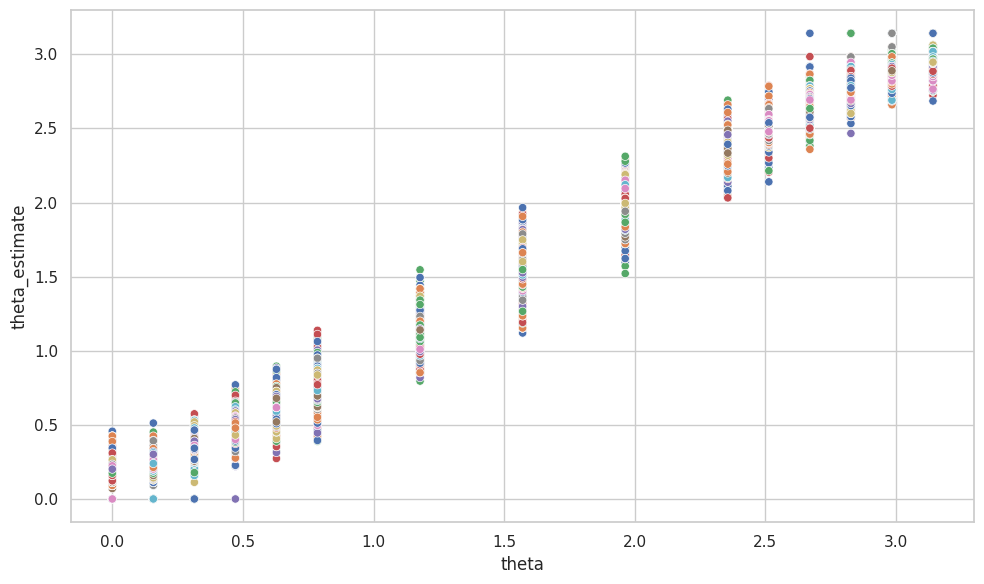

In [6]:
# plot the theta estimate against theta

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_df, x="theta", y="theta_estimate", hue="N", palette="deep")

# no legend
plt.legend([], [], frameon=False)

plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "theta_estimate_vs_true_theta.png")
plt.savefig(file_name, dpi=300)
plt.show()

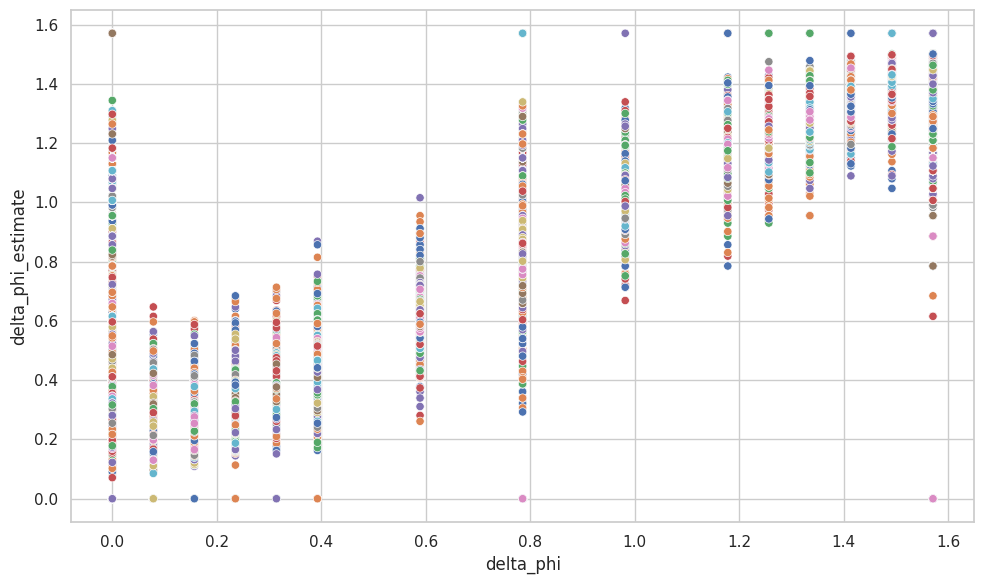

In [7]:
# plot the theta estimate against theta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_df, x="delta_phi", y="delta_phi_estimate", hue="N", palette="deep")

# no legend
plt.legend([], [], frameon=False)

plt.tight_layout()

# save the figure
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "delta_phi_estimate_vs_true_delta_phi.png")
plt.savefig(file_name, dpi=300)
plt.show()

In [8]:
estimates_summary_df = estimates_df.groupby(["data_dir", "N"]).agg({
    "theta_estimate": ["mean", "std", "var"],
    "delta_phi_estimate": ["mean", "std", "var"],
    "theta": ["mean"],
    "delta_phi": ["mean"]
}).reset_index().rename(columns={"data_dir": "Data Directory"})
estimates_summary_df

Data Directory        N theta_estimate                      \
                                                 mean       std       var   
0     2025-05-31--12h-43m-09s     39.0       0.155550  0.122012  0.014887   
1     2025-05-31--12h-43m-09s     39.5       0.197378  0.057640  0.003322   
2     2025-05-31--12h-43m-09s     40.0       0.149793  0.125951  0.015864   
3     2025-05-31--12h-43m-09s     40.5       0.195485  0.064150  0.004115   
4     2025-05-31--12h-43m-09s     41.0       0.142719  0.123550  0.015264   
...                       ...      ...            ...       ...       ...   
4125  2025-06-01--02h-34m-20s    201.5       1.516105  0.070754  0.005006   
4126  2025-06-01--02h-34m-20s    202.0       1.570798  0.032847  0.001079   
4127  2025-06-01--02h-34m-20s    202.5       1.555970  0.040441  0.001635   
4128  2025-06-01--02h-34m-20s    203.0       1.521515       NaN       NaN   
4129  2025-06-01--02h-34m-20s  17971.0       1.547089       NaN       NaN   

     delta_phi_estimate                         theta delta_phi  
                   mean       std       var      mean      mean  
0              1.490243  0.221580  0.049098  0.000000  0.000000  
1              1.525025  0.198666  0.039468  0.000000  0.000000  
2              1.477784  0.240891  0.058029  0.000000  0.000000  
3              1.491560  0.308261  0.095025  0.000000  0.000000  
4              1.454441  0.268771  0.072238  0.000000  0.000000  
...                 ...       ...       ...       ...       ...  
4125           1.491964  0.014993  0.000225  1.570796  1.570796  
4126           1.451981  0.023439  0.000549  1.570796  1.570796  
4127           1.503847  0.057982  0.003362  1.570796  1.570796  
4128           1.570796       NaN       NaN  1.570796  1.570796  
4129           1.462638       NaN       NaN  1.570796  1.570796  

[4130 rows x 10 columns]

In [9]:
estimates_summary_df["2_n_var"] = estimates_summary_df["N"] * 2 * estimates_summary_df["theta_estimate"]["var"]
estimates_summary_df["theta_error"] = estimates_summary_df["theta_estimate"]["mean"] - estimates_summary_df["theta"]["mean"]
estimates_summary_df["root_n_theta_error"] = np.sqrt(estimates_summary_df["N"]) * estimates_summary_df["theta_error"]
estimates_summary_df

Data Directory        N theta_estimate                      \
                                                 mean       std       var   
0     2025-05-31--12h-43m-09s     39.0       0.155550  0.122012  0.014887   
1     2025-05-31--12h-43m-09s     39.5       0.197378  0.057640  0.003322   
2     2025-05-31--12h-43m-09s     40.0       0.149793  0.125951  0.015864   
3     2025-05-31--12h-43m-09s     40.5       0.195485  0.064150  0.004115   
4     2025-05-31--12h-43m-09s     41.0       0.142719  0.123550  0.015264   
...                       ...      ...            ...       ...       ...   
4125  2025-06-01--02h-34m-20s    201.5       1.516105  0.070754  0.005006   
4126  2025-06-01--02h-34m-20s    202.0       1.570798  0.032847  0.001079   
4127  2025-06-01--02h-34m-20s    202.5       1.555970  0.040441  0.001635   
4128  2025-06-01--02h-34m-20s    203.0       1.521515       NaN       NaN   
4129  2025-06-01--02h-34m-20s  17971.0       1.547089       NaN       NaN   

     delta_phi_estimate                         theta delta_phi   2_n_var  \
                   mean       std       var      mean      mean             
0              1.490243  0.221580  0.049098  0.000000  0.000000  1.161174   
1              1.525025  0.198666  0.039468  0.000000  0.000000  0.262465   
2              1.477784  0.240891  0.058029  0.000000  0.000000  1.269092   
3              1.491560  0.308261  0.095025  0.000000  0.000000  0.333334   
4              1.454441  0.268771  0.072238  0.000000  0.000000  1.251688   
...                 ...       ...       ...       ...       ...       ...   
4125           1.491964  0.014993  0.000225  1.570796  1.570796  2.017468   
4126           1.451981  0.023439  0.000549  1.570796  1.570796  0.435885   
4127           1.503847  0.057982  0.003362  1.570796  1.570796  0.662372   
4128           1.570796       NaN       NaN  1.570796  1.570796       NaN   
4129           1.462638       NaN       NaN  1.570796  1.570796       NaN   

     theta_error root_n_theta_error  
                                     
0       0.155550           0.971408  
1       0.197378           1.240499  
2       0.149793           0.947376  
3       0.195485           1.244060  
4       0.142719           0.913847  
...          ...                ...  
4125   -0.054691          -0.776343  
4126    0.000002           0.000028  
4127   -0.014826          -0.210977  
4128   -0.049281          -0.702147  
4129   -0.023707          -3.178075  

[4130 rows x 13 columns]

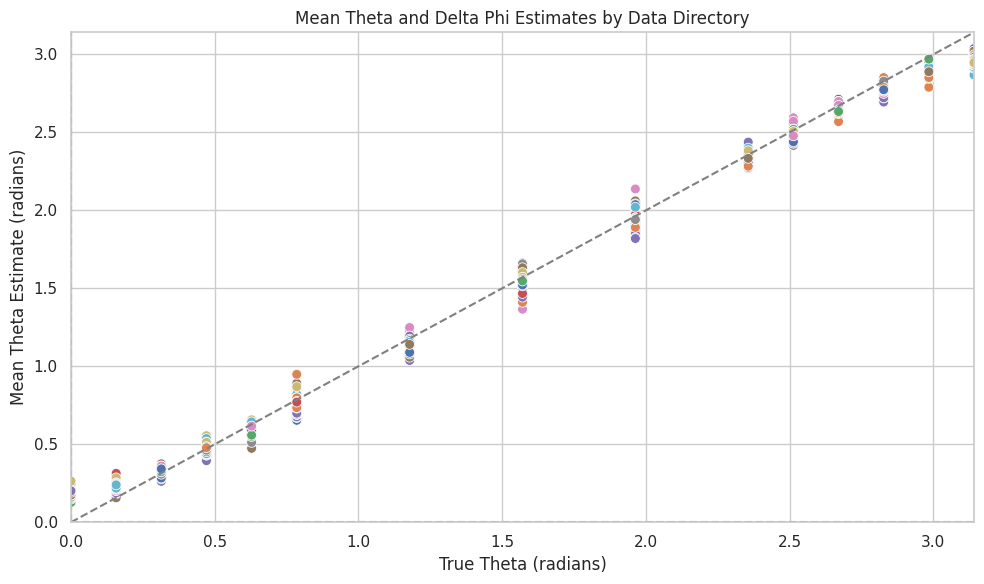

In [10]:
# plot the means as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("theta", "mean"),
                y=("theta_estimate", "mean"),
                hue="N", palette="deep", s=50)
plt.title("Mean Theta and Delta Phi Estimates by Data Directory")
plt.xlabel("True Theta (radians)")
plt.ylabel("Mean Theta Estimate (radians)")
plt.axline((0, 0), slope=1, color='gray', linestyle='--')

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlim(0, np.pi)
plt.ylim(0, np.pi)
# no legend
plt.legend([], [], frameon=False)
plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_theta_delta_phi_estimates_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

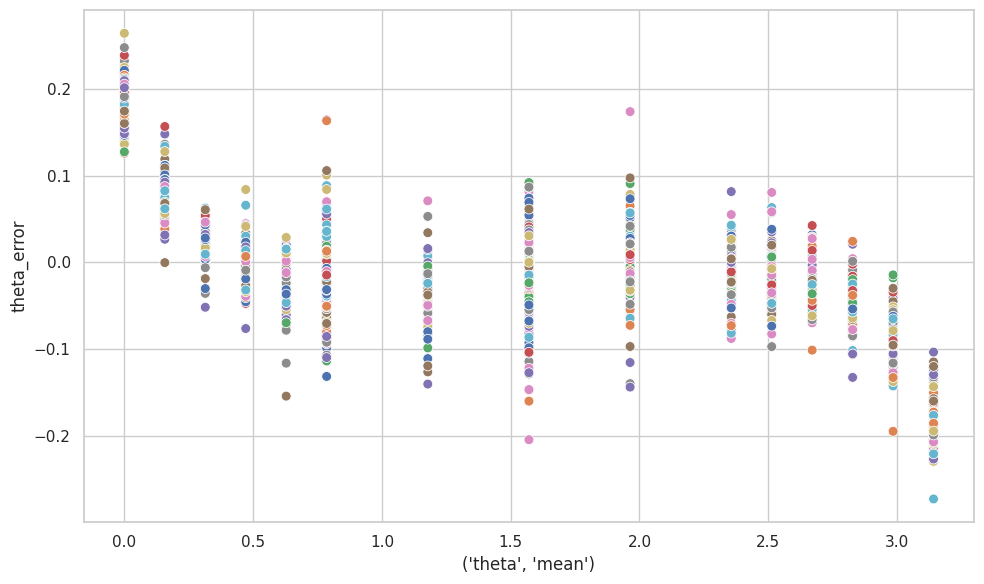

In [11]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("theta", "mean"),
                y=("theta_error"),
                hue="N", palette="deep", s=50)

# no legend
plt.legend([], [], frameon=False)

plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_theta_error_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

In [12]:
fixed_n_estimates_summary_df = estimates_summary_df[estimates_summary_df["N"].isin([40, 80, 120, 160, 200])].reset_index(drop=True)
fixed_n_estimates_summary_df

Data Directory      N theta_estimate                      \
                                              mean       std       var   
0    2025-05-31--12h-43m-09s   40.0       0.149793  0.125951  0.015864   
1    2025-05-31--12h-43m-09s   80.0       0.182812  0.075587  0.005713   
2    2025-05-31--12h-43m-09s  120.0       0.193234  0.050150  0.002515   
3    2025-05-31--12h-43m-09s  160.0       0.178552  0.066913  0.004477   
4    2025-05-31--12h-43m-09s  200.0       0.202769  0.033500  0.001122   
..                       ...    ...            ...       ...       ...   
370  2025-06-01--02h-34m-20s   40.0       1.547114  0.114332  0.013072   
371  2025-06-01--02h-34m-20s   80.0       1.546594  0.056310  0.003171   
372  2025-06-01--02h-34m-20s  120.0       1.553033  0.055997  0.003136   
373  2025-06-01--02h-34m-20s  160.0       1.570278  0.044886  0.002015   
374  2025-06-01--02h-34m-20s  200.0       1.546544  0.044471  0.001978   

    delta_phi_estimate                         theta delta_phi   2_n_var  \
                  mean       std       var      mean      mean             
0             1.477784  0.240891  0.058029  0.000000  0.000000  1.269092   
1             1.405098  0.284991  0.081220  0.000000  0.000000  0.914132   
2             1.474418  0.195594  0.038257  0.000000  0.000000  0.603613   
3             1.470826  0.178107  0.031722  0.000000  0.000000  1.432757   
4             1.481110  0.157148  0.024695  0.000000  0.000000  0.448895   
..                 ...       ...       ...       ...       ...       ...   
370           1.519908  0.079270  0.006284  1.570796  1.570796  1.045740   
371           1.492020  0.073993  0.005475  1.570796  1.570796  0.507334   
372           1.493097  0.065441  0.004283  1.570796  1.570796  0.752571   
373           1.463024  0.059313  0.003518  1.570796  1.570796  0.644721   
374           1.478416  0.068778  0.004730  1.570796  1.570796  0.791061   

    theta_error root_n_theta_error  
                                    
0      0.149793           0.947376  
1      0.182812           1.635125  
2      0.193234           2.116772  
3      0.178552           2.258529  
4      0.202769           2.867589  
..          ...                ...  
370   -0.023682          -0.149781  
371   -0.024203          -0.216475  
372   -0.017763          -0.194585  
373   -0.000518          -0.006554  
374   -0.024252          -0.342979  

[375 rows x 13 columns]

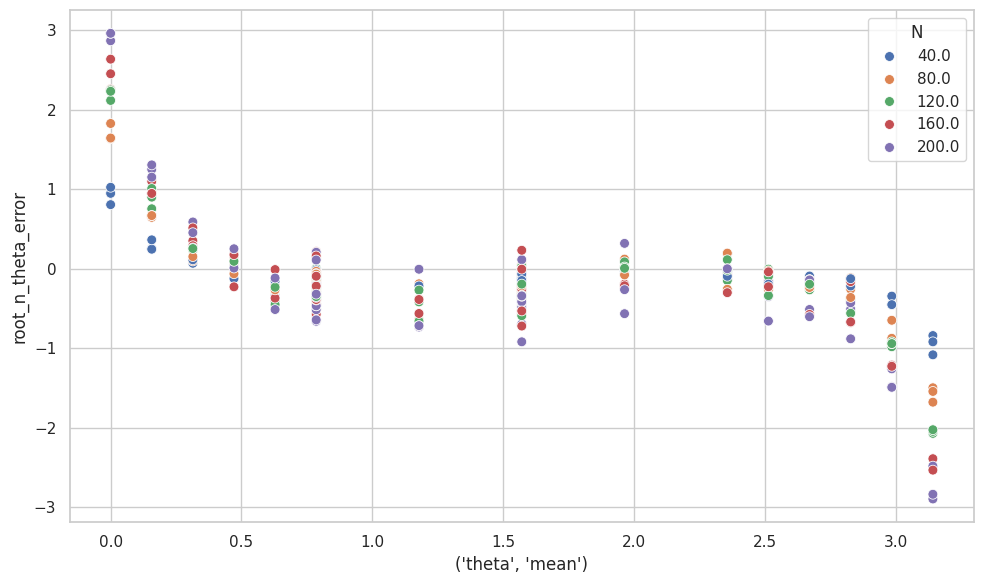

In [13]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=fixed_n_estimates_summary_df, x=("theta", "mean"),
                y=("root_n_theta_error"),
                hue="N", palette="deep", s=50)


plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_theta_error_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

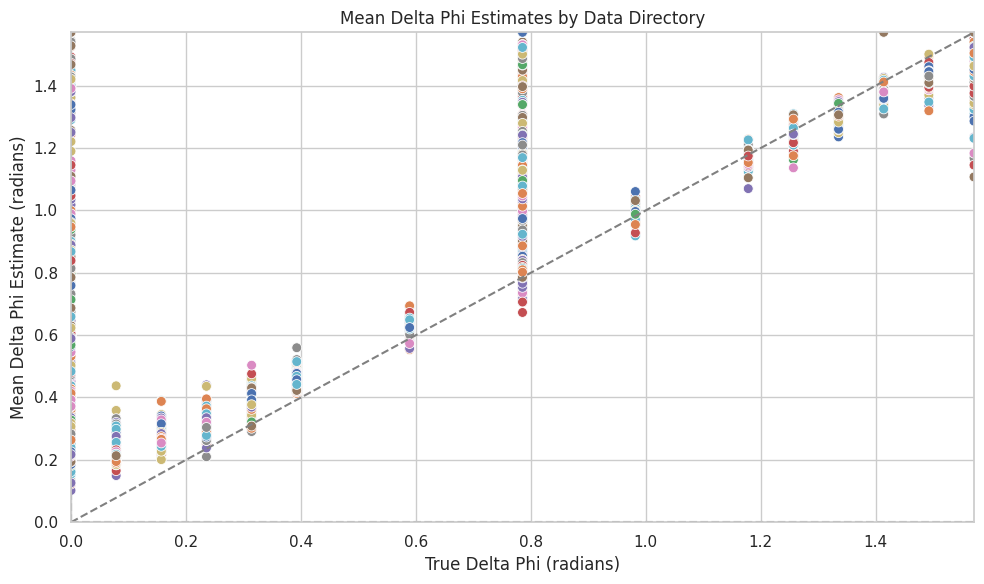

In [23]:
# plot the means as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("delta_phi", "mean"),
                y=("delta_phi_estimate", "mean"),
                hue=estimates_summary_df["N"].astype(str),
                palette="deep", s=50)
plt.title("Mean Delta Phi Estimates by Data Directory")
plt.xlabel("True Delta Phi (radians)")
plt.ylabel("Mean Delta Phi Estimate (radians)")

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

plt.axline((0, 0), slope=1, color='gray', linestyle='--')

plt.xlim(0, np.pi/2)
plt.ylim(0, np.pi/2)

# no legend
plt.legend([], [], frameon=False)
plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_delta_phi_theta_estimates_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

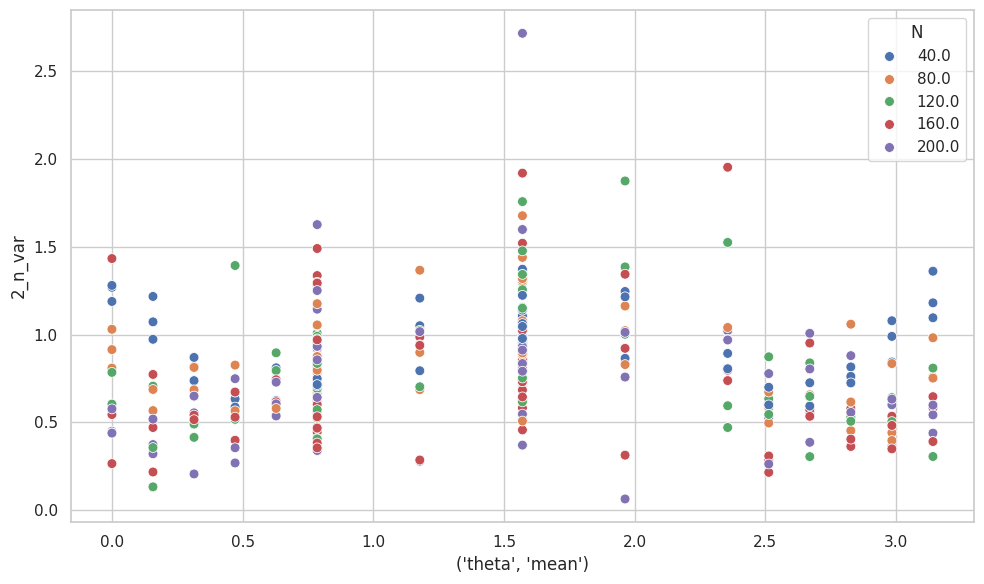

In [15]:
# plot the variances against the true value of theta as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fixed_n_estimates_summary_df, x=("theta", "mean"), y=("2_n_var"),
                hue=fixed_n_estimates_summary_df["N"].astype(str),
                palette="deep", s=50)


plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "variance_theta_delta_phi_estimates_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

# Best guess estimators 

Using all samples in the data_dir to estimate

In [16]:
# Row of max N in each data_dir
estimates_summary_df["max_N"] = estimates_summary_df.groupby("Data Directory")["N"].transform("max")
# Filter to keep only the rows with the maximum N for each data_dir
best_guess_estimators = estimates_summary_df[estimates_summary_df["N"] == estimates_summary_df["max_N"]].reset_index(drop=True)

best_guess_estimators


Data Directory        N theta_estimate          \
                                               mean std var   
0   2025-05-31--12h-43m-09s  18537.5       0.199179 NaN NaN   
1   2025-05-31--12h-54m-34s  18899.5       0.241509 NaN NaN   
2   2025-05-31--13h-05m-35s  18539.5       0.340679 NaN NaN   
3   2025-05-31--13h-16m-25s  18350.0       0.468829 NaN NaN   
4   2025-05-31--13h-27m-19s  18459.5       0.600315 NaN NaN   
..                      ...      ...            ...  ..  ..   
70  2025-06-01--01h-48m-47s  17739.5       1.528731 NaN NaN   
71  2025-06-01--02h-00m-02s  17768.5       1.542034 NaN NaN   
72  2025-06-01--02h-11m-24s  17899.0       1.541237 NaN NaN   
73  2025-06-01--02h-23m-04s  17708.0       1.546398 NaN NaN   
74  2025-06-01--02h-34m-20s  17971.0       1.547089 NaN NaN   

   delta_phi_estimate             theta delta_phi 2_n_var theta_error  \
                 mean std var      mean      mean                       
0            1.344190 NaN NaN  0.000000  0.000000     NaN    0.199179   
1            0.961476 NaN NaN  0.157080  0.000000     NaN    0.084430   
2            0.630228 NaN NaN  0.314159  0.000000     NaN    0.026519   
3            0.431501 NaN NaN  0.471239  0.000000     NaN   -0.002410   
4            0.364995 NaN NaN  0.628319  0.000000     NaN   -0.028004   
..                ...  ..  ..       ...       ...     ...         ...   
70           1.244591 NaN NaN  1.570796  1.256637     NaN   -0.042065   
71           1.306207 NaN NaN  1.570796  1.335177     NaN   -0.028763   
72           1.379628 NaN NaN  1.570796  1.413717     NaN   -0.029559   
73           1.430359 NaN NaN  1.570796  1.492257     NaN   -0.024398   
74           1.462638 NaN NaN  1.570796  1.570796     NaN   -0.023707   

   root_n_theta_error    max_N  
                                
0           27.118778  18537.5  
1           11.607027  18899.5  
2            3.610880  18539.5  
3           -0.326476  18350.0  
4           -3.804736  18459.5  
..                ...      ...  
70          -5.602685  17739.5  
71          -3.834029  17768.5  
72          -3.954618  17899.0  
73          -3.246699  17708.0  
74          -3.178075  17971.0  

[75 rows x 14 columns]

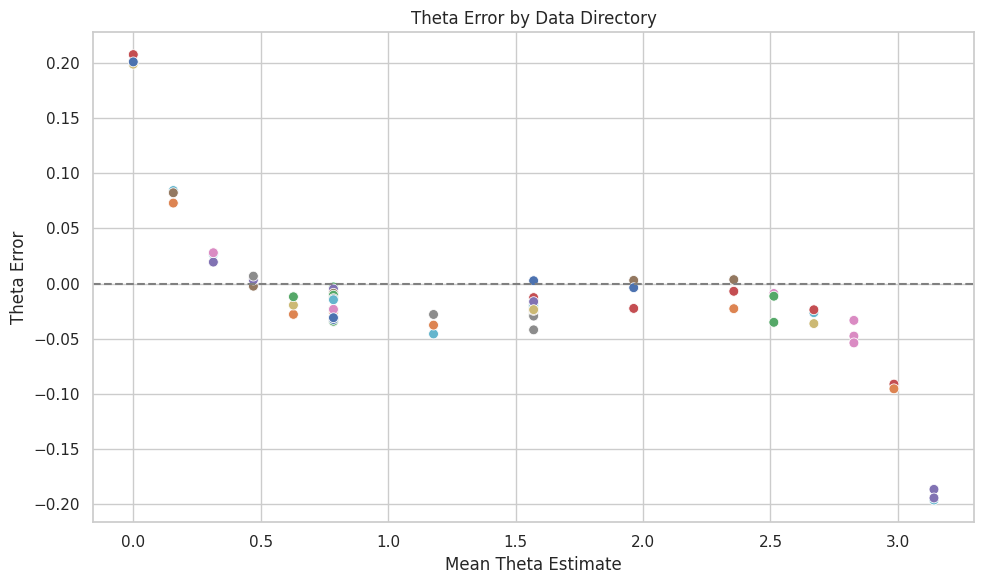

In [17]:
# plot the theta_error
plt.figure(figsize=(10, 6))
sns.scatterplot(data=best_guess_estimators, x=("theta", "mean"),
                y=("theta_error"),
                hue="N", palette="deep", s=50)
plt.title("Theta Error by Data Directory")
plt.xlabel("Mean Theta Estimate")
plt.ylabel("Theta Error")
plt.axhline(0, color='gray', linestyle='--')

plt.legend([], [], frameon=False)
plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "best_guess_theta_error_by_data_dir.png")
plt.savefig(file_name, dpi=300)

plt.show()

In [18]:
best_guess_estimators

# flatten the best_guess_estimators DataFrame
best_guess_estimators_flat = best_guess_estimators.copy()
best_guess_estimators_flat.columns = ['_'.join(col).strip() for col in best_guess_estimators_flat.columns.values]
best_guess_estimators_flat

,Data Directory_,N_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,theta_mean,delta_phi_mean,2_n_var_,theta_error_,root_n_theta_error_,max_N_
0,2025-05-31--12h-43m-09s,18537.5,0.199179,NaN,NaN,1.344190,NaN,NaN,0.000000,0.000000,NaN,0.199179,27.118778,18537.5
1,2025-05-31--12h-54m-34s,18899.5,0.241509,NaN,NaN,0.961476,NaN,NaN,0.157080,0.000000,NaN,0.084430,11.607027,18899.5
2,2025-05-31--13h-05m-35s,18539.5,0.340679,NaN,NaN,0.630228,NaN,NaN,0.314159,0.000000,NaN,0.026519,3.610880,18539.5
3,2025-05-31--13h-16m-25s,18350.0,0.468829,NaN,NaN,0.431501,NaN,NaN,0.471239,0.000000,NaN,-0.002410,-0.326476,18350.0
4,2025-05-31--13h-27m-19s,18459.5,0.600315,NaN,NaN,0.364995,NaN,NaN,0.628319,0.000000,NaN,-0.028004,-3.804736,18459.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2025-06-01--01h-48m-47s,17739.5,1.528731,NaN,NaN,1.244591,NaN,NaN,1.570796,1.256637,NaN,-0.042065,-5.602685,17739.5
71,2025-06-01--02h-00m-02s,17768.5,1.542034,NaN,NaN,1.306207,NaN,NaN,1.570796,1.335177,NaN,-0.028763,-3.834029,17768.5
72,2025-06-01--02h-11m-24s,17899.0,1.541237,NaN,NaN,1.379628,NaN,NaN,1.570796,1.413717,NaN,-0.029559,-3.954618,17899.0
73,2025-06-01--02h-23m-04s,17708.0,1.546398,NaN,NaN,1.430359,NaN,NaN,1.570796,1.492257,NaN,-0.024398,-3.246699,17708.0


In [19]:
known_theta_offset = best_guess_estimators_flat.groupby("theta_mean").agg({
    "theta_estimate_mean": ["mean"],
}).reset_index().rename(columns={"theta_mean": "True Theta (radians)"})

known_theta_offset.columns = ["prepared_theta", "best_guess_estimator_theta"]
known_theta_offset

,prepared_theta,best_guess_estimator_theta
0,0.000000,0.202769
1,0.157080,0.237046
2,0.314159,0.338811
3,0.471239,0.473730
4,0.628319,0.608452
5,0.785398,0.766564
6,1.178097,1.140882
7,1.570796,1.547622
8,1.963495,1.955649
9,2.356194,2.347411


In [20]:
# flatten the fixed_n_estimates_summary_df
fixed_n_estimates_summary_df_flat = fixed_n_estimates_summary_df.copy()
fixed_n_estimates_summary_df_flat.columns = ['_'.join(col).strip() for col in fixed_n_estimates_summary_df_flat.columns.values]

fixed_n_estimates_summary_df_flat["theta_mean"] = np.round(fixed_n_estimates_summary_df_flat["theta_mean"].astype(float), 4)
known_theta_offset["prepared_theta"] = np.round(known_theta_offset["prepared_theta"].astype(float), 4)

# join the known_theta_offset with the fixed_n_estimates_summary_df
fixed_n_theta_offsets = fixed_n_estimates_summary_df_flat.merge(known_theta_offset, 
                                        left_on="theta_mean",
                                        right_on="prepared_theta",
)

fixed_n_theta_offsets = fixed_n_theta_offsets.drop(columns=["prepared_theta"])
fixed_n_theta_offsets

,Data Directory_,N_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,theta_mean,delta_phi_mean,2_n_var_,theta_error_,root_n_theta_error_,best_guess_estimator_theta
0,2025-05-31--12h-43m-09s,40.0,0.149793,0.125951,0.015864,1.477784,0.240891,0.058029,0.0000,0.000000,1.269092,0.149793,0.947376,0.202769
1,2025-05-31--12h-43m-09s,80.0,0.182812,0.075587,0.005713,1.405098,0.284991,0.081220,0.0000,0.000000,0.914132,0.182812,1.635125,0.202769
2,2025-05-31--12h-43m-09s,120.0,0.193234,0.050150,0.002515,1.474418,0.195594,0.038257,0.0000,0.000000,0.603613,0.193234,2.116772,0.202769
3,2025-05-31--12h-43m-09s,160.0,0.178552,0.066913,0.004477,1.470826,0.178107,0.031722,0.0000,0.000000,1.432757,0.178552,2.258529,0.202769
4,2025-05-31--12h-43m-09s,200.0,0.202769,0.033500,0.001122,1.481110,0.157148,0.024695,0.0000,0.000000,0.448895,0.202769,2.867589,0.202769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,2025-06-01--02h-34m-20s,40.0,1.547114,0.114332,0.013072,1.519908,0.079270,0.006284,1.5708,1.570796,1.045740,-0.023682,-0.149781,1.547622
371,2025-06-01--02h-34m-20s,80.0,1.546594,0.056310,0.003171,1.492020,0.073993,0.005475,1.5708,1.570796,0.507334,-0.024203,-0.216475,1.547622
372,2025-06-01--02h-34m-20s,120.0,1.553033,0.055997,0.003136,1.493097,0.065441,0.004283,1.5708,1.570796,0.752571,-0.017763,-0.194585,1.547622
373,2025-06-01--02h-34m-20s,160.0,1.570278,0.044886,0.002015,1.463024,0.059313,0.003518,1.5708,1.570796,0.644721,-0.000518,-0.006554,1.547622


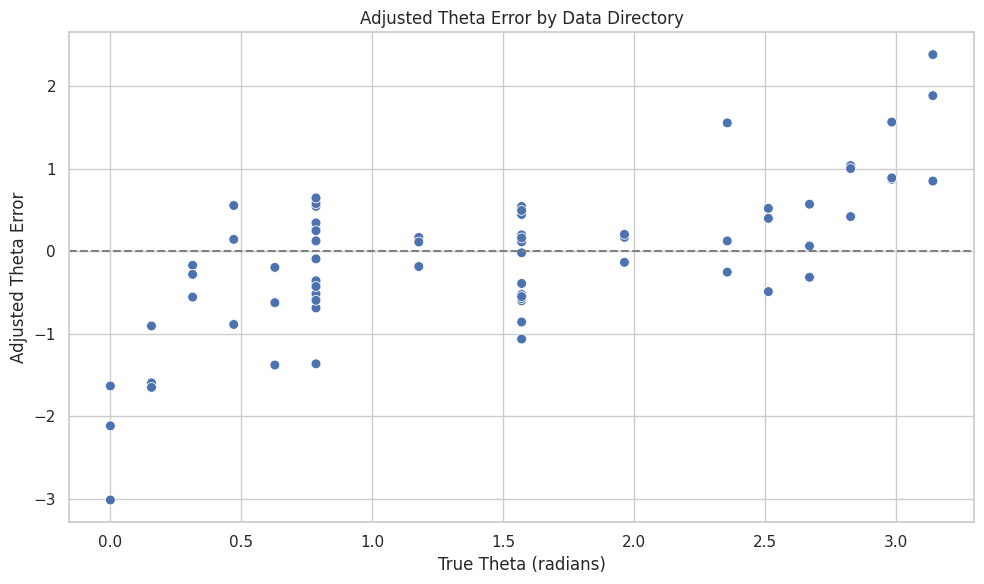

In [21]:
fixed_n_theta_offsets["adjusted_theta_error"] = 40 * (fixed_n_theta_offsets["theta_estimate_mean"] - fixed_n_theta_offsets["best_guess_estimator_theta"])
# plot the adjusted theta error
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fixed_n_theta_offsets[fixed_n_theta_offsets["N_"].isin([40])],
                x="theta_mean",
                y="adjusted_theta_error",
                hue=fixed_n_theta_offsets["N_"].astype(str),
                palette="deep", s=50)
plt.title("Adjusted Theta Error by Data Directory")
plt.xlabel("True Theta (radians)")
plt.ylabel("Adjusted Theta Error")
plt.axhline(0, color='gray', linestyle='--')
plt.legend([], [], frameon=False)
plt.tight_layout()

plt.show()